In [2]:
from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).
from sklearn import preprocessing
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, pairwise
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from dmba import plotDecisionTree, classificationSummary
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from dmba import classificationSummary, gainsChart, liftChart
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
import os
import calendar
import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from pathlib import Path # to interact with file system.
import numpy as np # for working with arrays.
import networkx as nx
import pandas as pd # for working with data frames (tables).
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns # Making statistical graphs on top of what matplot can do 
from sklearn import preprocessing
import matplotlib.pylab as plt # %matplotlib inline renders the figure in a notebook

%matplotlib inline


from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates

In [3]:
df1 = pd.read_csv('customer_cases.csv')
df1 = df1.rename(columns={df1.columns[0]:'id'})
df1 = df1.drop(columns=['id'])
df1.head()

,case_id,date_time,customer_id,channel,reason
0,CC101,2017-01-01 10:32:03,C2448,phone,signup
1,CC102,2017-01-01 11:35:47,C2449,phone,signup
2,CC103,2017-01-01 11:37:09,C2450,phone,signup
3,CC104,2017-01-01 13:28:14,C2451,phone,signup
4,CC105,2017-01-01 13:52:22,C2452,phone,signup


In [4]:
df2 = pd.read_csv('customer_info.csv')
df2 = df2.rename(columns={df2.columns[0]:'id'})
df2 = df2.drop(columns=['id'])
df2.head()

,customer_id,age,gender
0,C2448,76,female
1,C2449,61,male
2,C2450,58,female
3,C2451,62,female
4,C2452,71,male


In [5]:
df3 = pd.read_csv('customer_product.csv')
df3 = df3.rename(columns={df3.columns[0]:'id','product':'product_id'})
df3 = df3.drop(columns=['id'])

df3.head()

,customer_id,product_id,signup_date_time,cancel_date_time
0,C2448,prd_1,2017-01-01 10:35:09,NaN
1,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
2,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
3,C2451,prd_2,2017-01-01 13:32:08,NaN
4,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01


In [6]:
df4 = pd.read_csv('product_info.csv')
df4 = df4.rename(columns={'name':'subscription_type'})
df4.head()

,product_id,subscription_type,price,billing_cycle
0,prd_1,annual_subscription,1200,12
1,prd_2,monthly_subscription,125,1


In [7]:
# Merge customer_info and customer_product on 'customer_id' column
merged_df = pd.merge(df2,df3, on='customer_id')
merged_df.head()

,customer_id,age,gender,product_id,signup_date_time,cancel_date_time
0,C2448,76,female,prd_1,2017-01-01 10:35:09,NaN
1,C2449,61,male,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
2,C2450,58,female,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
3,C2451,62,female,prd_2,2017-01-01 13:32:08,NaN
4,C2452,71,male,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01


In [8]:
# Merge newly created data frame and customer_cases on 'customer_id' column
merged_df = pd.merge(merged_df,df1, on='customer_id')
merged_df.head()

,customer_id,age,gender,product_id,signup_date_time,cancel_date_time,case_id,date_time,channel,reason
0,C2448,76,female,prd_1,2017-01-01 10:35:09,NaN,CC101,2017-01-01 10:32:03,phone,signup
1,C2449,61,male,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,CC102,2017-01-01 11:35:47,phone,signup
2,C2450,58,female,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,CC103,2017-01-01 11:37:09,phone,signup
3,C2451,62,female,prd_2,2017-01-01 13:32:08,NaN,CC104,2017-01-01 13:28:14,phone,signup
4,C2451,62,female,prd_2,2017-01-01 13:32:08,NaN,CC4491,2017-03-31 12:06:58,phone,support


In [9]:
# Merge newly created data frame and product_info on 'product_id' column
cx_sub_df = pd.merge(merged_df,df4, on='product_id')
cx_sub_df.head()

,customer_id,age,gender,product_id,signup_date_time,cancel_date_time,case_id,date_time,channel,reason,subscription_type,price,billing_cycle
0,C2448,76,female,prd_1,2017-01-01 10:35:09,NaN,CC101,2017-01-01 10:32:03,phone,signup,annual_subscription,1200,12
1,C2449,61,male,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,CC102,2017-01-01 11:35:47,phone,signup,annual_subscription,1200,12
2,C2450,58,female,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,CC103,2017-01-01 11:37:09,phone,signup,annual_subscription,1200,12
3,C2452,71,male,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01,CC105,2017-01-01 13:52:22,phone,signup,annual_subscription,1200,12
4,C2453,56,male,prd_1,2017-01-01 15:26:14,NaN,CC106,2017-01-01 15:23:02,phone,signup,annual_subscription,1200,12


In [10]:
cx_sub_df.describe

<bound method NDFrame.describe of        customer_id  age  gender product_id     signup_date_time  \
0            C2448   76  female      prd_1  2017-01-01 10:35:09   
1            C2449   61    male      prd_1  2017-01-01 11:39:29   
2            C2450   58  female      prd_1  2017-01-01 11:42:00   
3            C2452   71    male      prd_1  2017-01-01 13:57:30   
4            C2453   56    male      prd_1  2017-01-01 15:26:14   
...            ...  ...     ...        ...                  ...   
330507     C510298   68    male      prd_2  2021-12-26 06:02:25   
330508     C510328   55  female      prd_2  2021-12-26 12:04:00   
330509     C510553   69    male      prd_2  2021-12-27 16:02:20   
330510     C510580   57  female      prd_2  2021-12-27 17:07:58   
330511     C511159   60  female      prd_2  2021-12-30 15:24:47   

           cancel_date_time   case_id            date_time channel   reason  \
0                       NaN     CC101  2017-01-01 10:32:03   phone   signup   
1  

In [11]:
cx_sub_df.columns

Index(['customer_id', 'age', 'gender', 'product_id', 'signup_date_time',
       'cancel_date_time', 'case_id', 'date_time', 'channel', 'reason',
       'subscription_type', 'price', 'billing_cycle'],
      dtype='object')

In [12]:
missing_values = cx_sub_df.isna()
num_missing = missing_values.sum()

# Print the number of missing values in each column
print(num_missing)

customer_id               0
age                       0
gender                    0
product_id                0
signup_date_time          0
cancel_date_time     253826
case_id                   0
date_time                 0
channel                   0
reason                    0
subscription_type         0
price                     0
billing_cycle             0
dtype: int64


In [13]:
cx_sub_df['churn'] = np.where(cx_sub_df['cancel_date_time'].isna(), 0, 1)

In [14]:
cx_sub_df.head()

,customer_id,age,gender,product_id,signup_date_time,cancel_date_time,case_id,date_time,channel,reason,subscription_type,price,billing_cycle,churn
0,C2448,76,female,prd_1,2017-01-01 10:35:09,NaN,CC101,2017-01-01 10:32:03,phone,signup,annual_subscription,1200,12,0
1,C2449,61,male,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,CC102,2017-01-01 11:35:47,phone,signup,annual_subscription,1200,12,1
2,C2450,58,female,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,CC103,2017-01-01 11:37:09,phone,signup,annual_subscription,1200,12,1
3,C2452,71,male,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01,CC105,2017-01-01 13:52:22,phone,signup,annual_subscription,1200,12,1
4,C2453,56,male,prd_1,2017-01-01 15:26:14,NaN,CC106,2017-01-01 15:23:02,phone,signup,annual_subscription,1200,12,0


In [15]:
cx_sub_df['cancel_date_time_updated'] = cx_sub_df['cancel_date_time'].fillna('2023-05-10 00:00:00')

In [16]:
cx_sub_df1 = cx_sub_df.drop(columns=['cancel_date_time'])

In [17]:
cx_sub_df1.head()

,customer_id,age,gender,product_id,signup_date_time,case_id,date_time,channel,reason,subscription_type,price,billing_cycle,churn,cancel_date_time_updated
0,C2448,76,female,prd_1,2017-01-01 10:35:09,CC101,2017-01-01 10:32:03,phone,signup,annual_subscription,1200,12,0,2023-05-10 00:00:00
1,C2449,61,male,prd_1,2017-01-01 11:39:29,CC102,2017-01-01 11:35:47,phone,signup,annual_subscription,1200,12,1,2021-09-05 10:00:02
2,C2450,58,female,prd_1,2017-01-01 11:42:00,CC103,2017-01-01 11:37:09,phone,signup,annual_subscription,1200,12,1,2019-01-13 16:24:55
3,C2452,71,male,prd_1,2017-01-01 13:57:30,CC105,2017-01-01 13:52:22,phone,signup,annual_subscription,1200,12,1,2021-06-28 18:06:01
4,C2453,56,male,prd_1,2017-01-01 15:26:14,CC106,2017-01-01 15:23:02,phone,signup,annual_subscription,1200,12,0,2023-05-10 00:00:00


In [18]:
missing_values1 = cx_sub_df1.isna()
num_missing1 = missing_values1.sum()

# Print the number of missing values in each column
print(num_missing1)

customer_id                 0
age                         0
gender                      0
product_id                  0
signup_date_time            0
case_id                     0
date_time                   0
channel                     0
reason                      0
subscription_type           0
price                       0
billing_cycle               0
churn                       0
cancel_date_time_updated    0
dtype: int64


In [19]:
cx_sub_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330512 entries, 0 to 330511
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   customer_id               330512 non-null  object
 1   age                       330512 non-null  int64 
 2   gender                    330512 non-null  object
 3   product_id                330512 non-null  object
 4   signup_date_time          330512 non-null  object
 5   case_id                   330512 non-null  object
 6   date_time                 330512 non-null  object
 7   channel                   330512 non-null  object
 8   reason                    330512 non-null  object
 9   subscription_type         330512 non-null  object
 10  price                     330512 non-null  int64 
 11  billing_cycle             330512 non-null  int64 
 12  churn                     330512 non-null  int32 
 13  cancel_date_time_updated  330512 non-null  object
dtypes: i

In [20]:
# Convert 'signup_date_time' and 'cancel_date_time_updated' columns to datetime
cx_sub_df1['signup_date_time'] = pd.to_datetime(cx_sub_df1['signup_date_time'])
cx_sub_df1['cancel_date_time_updated'] = pd.to_datetime(cx_sub_df1['cancel_date_time_updated'])

# Create a new column called 'subscription_duration'
cx_sub_df1['subscription_duration'] = (cx_sub_df1['cancel_date_time_updated'] - cx_sub_df1['signup_date_time']).dt.days

# Print the updated DataFrame
print(cx_sub_df1)

       customer_id  age  gender product_id    signup_date_time   case_id  \
0            C2448   76  female      prd_1 2017-01-01 10:35:09     CC101   
1            C2449   61    male      prd_1 2017-01-01 11:39:29     CC102   
2            C2450   58  female      prd_1 2017-01-01 11:42:00     CC103   
3            C2452   71    male      prd_1 2017-01-01 13:57:30     CC105   
4            C2453   56    male      prd_1 2017-01-01 15:26:14     CC106   
...            ...  ...     ...        ...                 ...       ...   
330507     C510298   68    male      prd_2 2021-12-26 06:02:25  CC330226   
330508     C510328   55  female      prd_2 2021-12-26 12:04:00  CC329804   
330509     C510553   69    male      prd_2 2021-12-27 16:02:20  CC330303   
330510     C510580   57  female      prd_2 2021-12-27 17:07:58  CC330235   
330511     C511159   60  female      prd_2 2021-12-30 15:24:47  CC330395   

                  date_time channel   reason     subscription_type  price  \
0       20

In [21]:
cx_sub_df1 = cx_sub_df1.drop_duplicates()
cx_sub_df1.head()

,customer_id,age,gender,product_id,signup_date_time,case_id,date_time,channel,reason,subscription_type,price,billing_cycle,churn,cancel_date_time_updated,subscription_duration
0,C2448,76,female,prd_1,2017-01-01 10:35:09,CC101,2017-01-01 10:32:03,phone,signup,annual_subscription,1200,12,0,2023-05-10 00:00:00,2319
1,C2449,61,male,prd_1,2017-01-01 11:39:29,CC102,2017-01-01 11:35:47,phone,signup,annual_subscription,1200,12,1,2021-09-05 10:00:02,1707
2,C2450,58,female,prd_1,2017-01-01 11:42:00,CC103,2017-01-01 11:37:09,phone,signup,annual_subscription,1200,12,1,2019-01-13 16:24:55,742
3,C2452,71,male,prd_1,2017-01-01 13:57:30,CC105,2017-01-01 13:52:22,phone,signup,annual_subscription,1200,12,1,2021-06-28 18:06:01,1639
4,C2453,56,male,prd_1,2017-01-01 15:26:14,CC106,2017-01-01 15:23:02,phone,signup,annual_subscription,1200,12,0,2023-05-10 00:00:00,2319


In [22]:
cx_sub_df1['signup_date_time_new'] = (cx_sub_df1['signup_date_time'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
cx_sub_df1['cancel_date_time_new'] = (cx_sub_df1['cancel_date_time_updated'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

cx_sub_df1.info()
cx_sub_df1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330512 entries, 0 to 330511
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customer_id               330512 non-null  object        
 1   age                       330512 non-null  int64         
 2   gender                    330512 non-null  object        
 3   product_id                330512 non-null  object        
 4   signup_date_time          330512 non-null  datetime64[ns]
 5   case_id                   330512 non-null  object        
 6   date_time                 330512 non-null  object        
 7   channel                   330512 non-null  object        
 8   reason                    330512 non-null  object        
 9   subscription_type         330512 non-null  object        
 10  price                     330512 non-null  int64         
 11  billing_cycle             330512 non-null  int64         
 12  ch

,age,price,billing_cycle,churn,subscription_duration,signup_date_time_new,cancel_date_time_new
count,330512.000000,330512.000000,330512.000000,330512.000000,330512.000000,3.305120e+05,3.305120e+05
mean,57.840617,672.163265,6.598880,0.232022,967.955878,1.580890e+09,1.664560e+09
std,9.394142,537.413942,5.499119,0.422123,511.495506,4.022516e+07,3.819625e+07
min,22.000000,125.000000,1.000000,0.000000,0.000000,1.483266e+09,1.483888e+09
25%,52.000000,125.000000,1.000000,0.000000,661.000000,1.553787e+09,1.683677e+09
50%,58.000000,1200.000000,12.000000,0.000000,851.000000,1.588508e+09,1.683677e+09
75%,65.000000,1200.000000,12.000000,0.000000,1292.000000,1.615569e+09,1.683677e+09
max,78.000000,1200.000000,12.000000,1.000000,2319.000000,1.640965e+09,1.683677e+09


## Dropping columns that don't add value to model building

In [23]:
cx_sub_df1 = cx_sub_df1.drop(columns=['customer_id','product_id','signup_date_time','cancel_date_time_updated'])
cx_sub_df1.columns

Index(['age', 'gender', 'case_id', 'date_time', 'channel', 'reason',
       'subscription_type', 'price', 'billing_cycle', 'churn',
       'subscription_duration', 'signup_date_time_new',
       'cancel_date_time_new'],
      dtype='object')

In [24]:
cx_sub_df1.head()

,age,gender,case_id,date_time,channel,reason,subscription_type,price,billing_cycle,churn,subscription_duration,signup_date_time_new,cancel_date_time_new
0,76,female,CC101,2017-01-01 10:32:03,phone,signup,annual_subscription,1200,12,0,2319,1483266909,1683676800
1,61,male,CC102,2017-01-01 11:35:47,phone,signup,annual_subscription,1200,12,1,1707,1483270769,1630836002
2,58,female,CC103,2017-01-01 11:37:09,phone,signup,annual_subscription,1200,12,1,742,1483270920,1547396695
3,71,male,CC105,2017-01-01 13:52:22,phone,signup,annual_subscription,1200,12,1,1639,1483279050,1624903561
4,56,male,CC106,2017-01-01 15:23:02,phone,signup,annual_subscription,1200,12,0,2319,1483284374,1683676800


In [25]:
cx_sub_df1.dtypes

age                       int64
gender                   object
case_id                  object
date_time                object
channel                  object
reason                   object
subscription_type        object
price                     int64
billing_cycle             int64
churn                     int32
subscription_duration     int64
signup_date_time_new      int64
cancel_date_time_new      int64
dtype: object

In [26]:
corr = cx_sub_df1.corr()

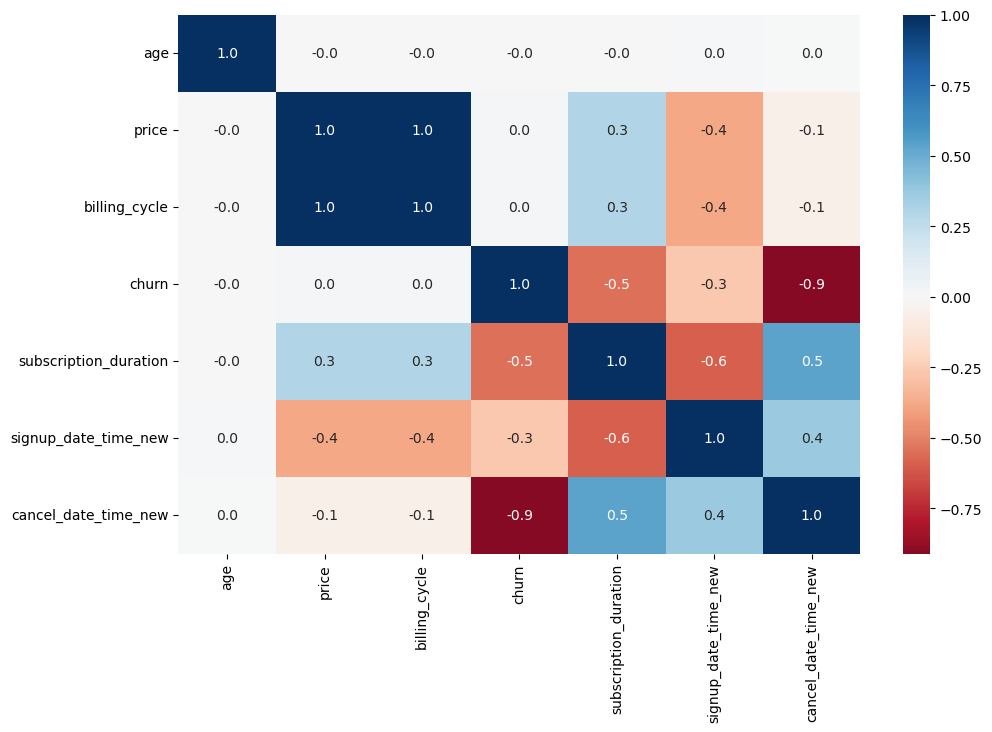

In [27]:
# Include information about values
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

In [28]:
predictors = ['age', 'gender', 'case_id', 'date_time', 'channel', 
       'subscription_type', 'price', 'billing_cycle', 'churn',
       'subscription_duration', 'signup_date_time_new',
       'cancel_date_time_new']
outcome = 'reason'

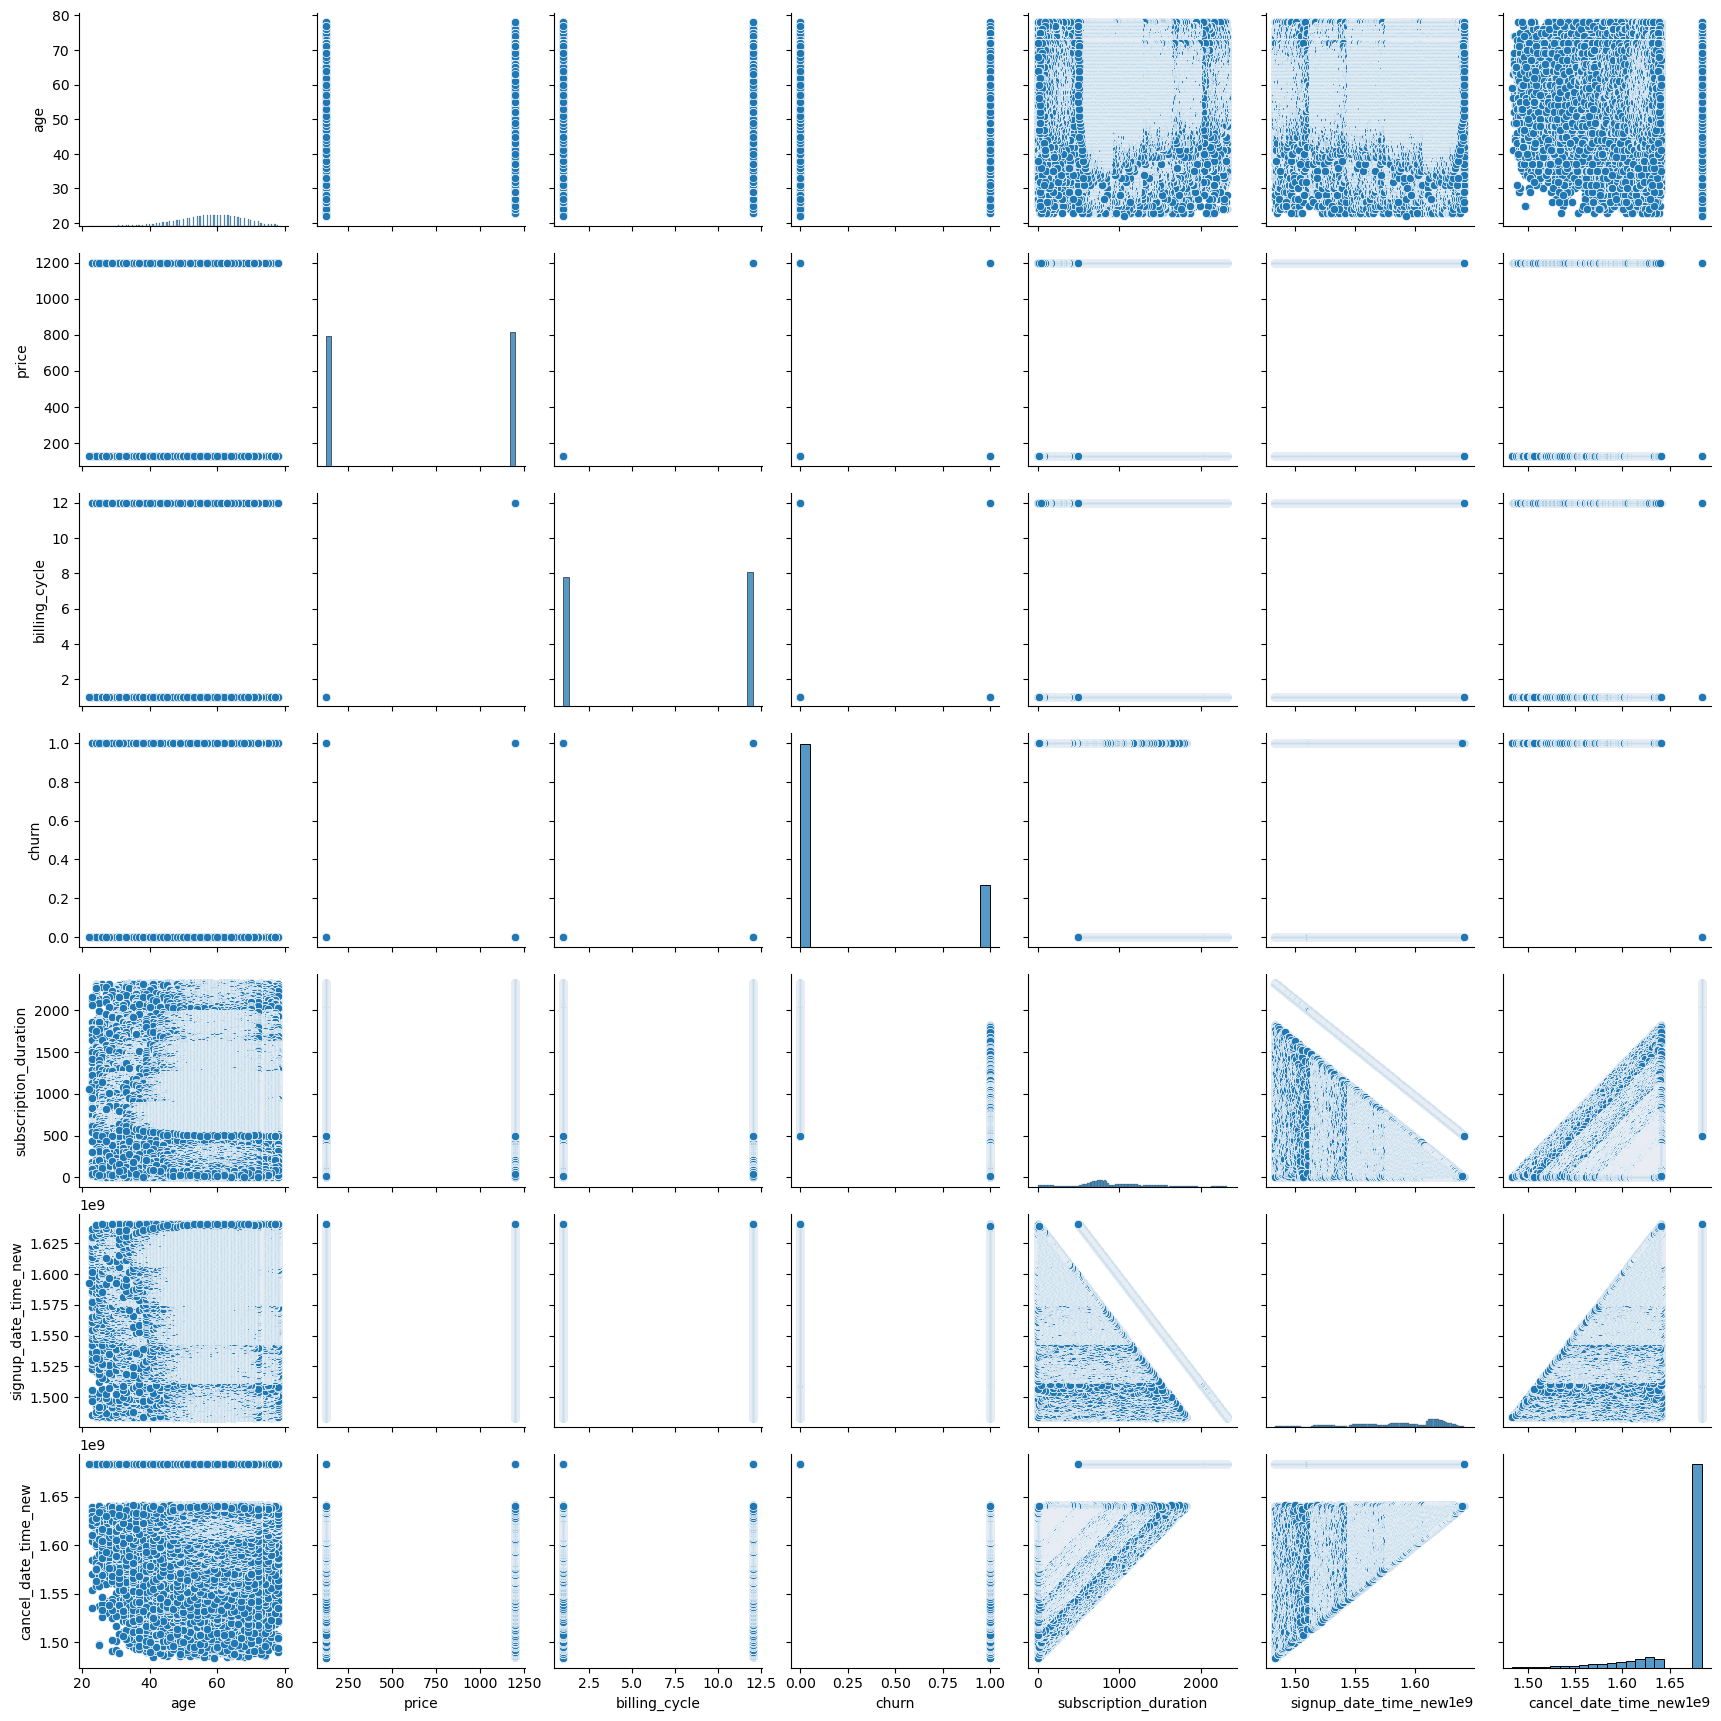

In [29]:
# Pairplot of the predictors
sns.pairplot(cx_sub_df1[predictors], diag_kind='hist')
plt.show()

C:\Users\STSC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


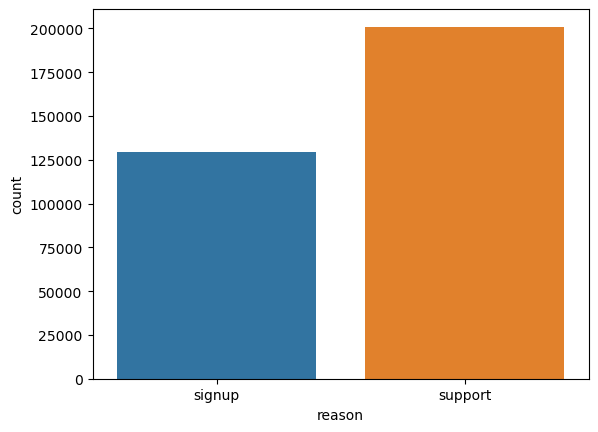

In [30]:
# Countplot of the target variable
sns.countplot(cx_sub_df1[outcome])
plt.show()

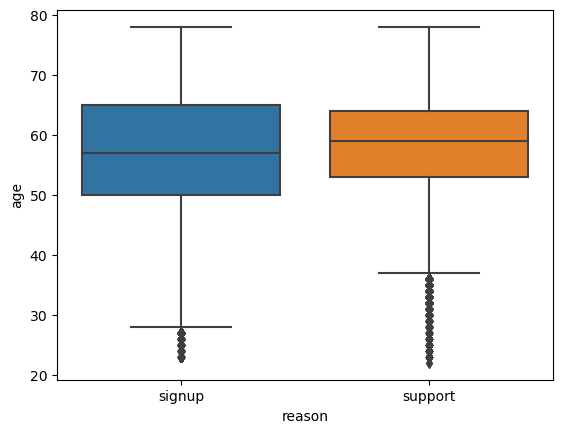

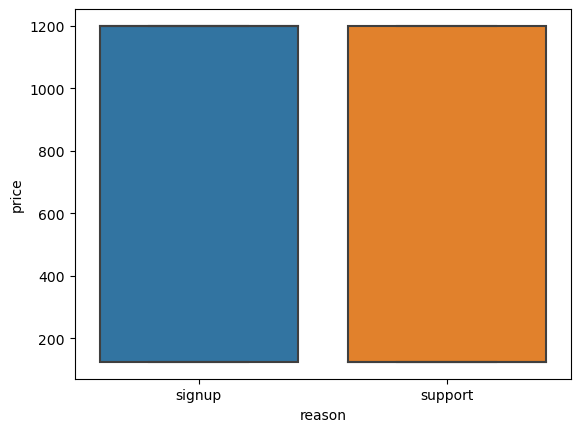

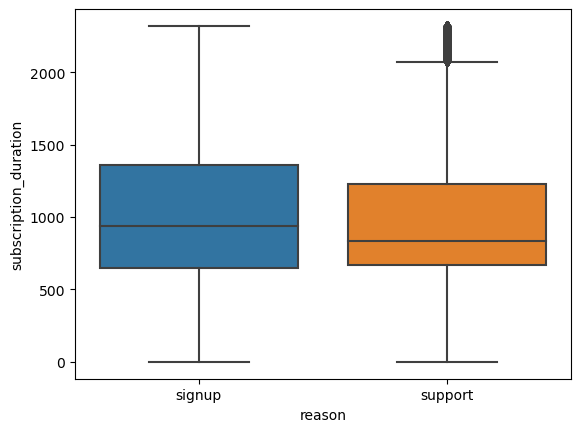

In [31]:
# Boxplot of the outcome variable for each continuous predictor
for col in ['age', 'price', 'subscription_duration']:
    sns.boxplot(x=outcome, y=col, data=cx_sub_df1)
    plt.show()

In [32]:
cx_sub_df1.gender = cx_sub_df1.gender.astype('category')
cx_sub_df1.channel = cx_sub_df1.channel.astype('category')
cx_sub_df1.subscription_type = cx_sub_df1.subscription_type.astype('category')
#cx_sub_df1['reason'] = [0 if reason=="signup" else 1 for reason in cx_sub_df1['reason']]
#cx_sub_df1.head()

### As the actual dataset is too large, we are taking only a random sample of data for our model building purposes

In [33]:
portion = 0.1

# Use sample() method to randomly select a portion of the data
cx_sub_df1_sample = cx_sub_df1.sample(frac=portion, random_state=1)

# Linear Regression

In [34]:
predictors = ['age', 'gender', 'case_id', 'date_time', 'channel', 
       'subscription_type', 'price', 'billing_cycle', 'churn',
       'subscription_duration', 'signup_date_time_new',
       'cancel_date_time_new']
outcome = 'reason'

# partition data
X = pd.get_dummies(cx_sub_df1_sample[predictors], drop_first=True)
y = cx_sub_df1_sample[outcome]


train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

cx_sub_lm = LinearRegression()
cx_sub_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', cx_sub_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': cx_sub_lm.coef_}))

# print performance measures
regressionSummary(train_y, cx_sub_lm.predict(train_X))

ValueError: could not convert string to float: 'signup'

### Measuring the performance on Validation Set

In [ ]:
# Use predict() to make predictions on a new set
cx_sub_pred = cx_sub_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': cx_sub_pred, 'Actual': valid_y,
                       'Residual': valid_y - cx_sub_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, cx_sub_pred)